# 讀入套件

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from ipywidgets import interact_manual
from tensorflow.keras.datasets import fashion_mnist

# 資料讀取與資料預處理

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [3]:
print(f'訓練資料總筆數為 {len(x_train)} 筆資料',f'測試資料總筆數為 {len(x_test)} 筆資料',sep='\n')

訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


In [4]:
labelname_dict = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape,y_test.shape,sep='\n')

(60000, 10)
(10000, 10)


# 開始建立模型

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## 模型隱藏層為4層，神經元個數分別為120、100、75、60
## 激勵函數 : relu、sigmoid、tanh

In [11]:
model = Sequential()
model.add(Dense(120,input_dim=784,activation='relu'))
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(75,activation='tanh'))
model.add(Dense(60,activation='relu'))

## 輸出層為10個神經元
## 激勵函數 : softmax

In [12]:
model.add(Dense(10,activation='softmax'))

## 損失函數 : mse
## 優化器 : Adam 
## Adam 優化器之參數設置 : learning_rate=0.001, beta_1=0.9, beta_2=0.999

In [13]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               94200     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               12100     
_________________________________________________________________
dense_2 (Dense)              (None, 75)                7575      
_________________________________________________________________
dense_3 (Dense)              (None, 60)                4560      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                610       
Total params: 119,045
Trainable params: 119,045
Non-trainable params: 0
_________________________________________________________________


## batch size = 100 ，也就是說一次訓練100筆資料
## 訓練次數為 50 次

In [15]:
model.fit(x_train,y_train,batch_size=100,epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0287 - accuracy: 0.7967
Epoch 2/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0203 - accuracy: 0.8591
Epoch 3/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0181 - accuracy: 0.8732
Epoch 4/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0174 - accuracy: 0.8791
Epoch 5/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0164 - accuracy: 0.8872
Epoch 6/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0157 - accuracy: 0.8921
Epoch 7/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0151 - accuracy: 0.8955
Epoch 8/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0148 - accuracy: 0.8984
Epoch 9/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0141 - accuracy: 0.9033
Epoch 10/50
60

## 查看訓練成果

In [16]:
result = model.predict_classes(x_test)

In [17]:
def show_xy(測試編號=0):
    ax = plt.gca()
    X = x_test[測試編號]
    plt.xticks([],[])
    plt.yticks([],[])
    plt.imshow(x_test[測試編號].reshape(28,28),cmap='Greys')
    print(f'神經網路預測的答案為: {labelname_dict[result[測試編號]]}')
interact_manual(show_xy,測試編號=(0,9999));

interactive(children=(IntSlider(value=0, description='測試編號', max=9999), Button(description='Run Interact', sty…

神經網路預測是: Pullover


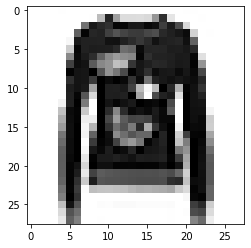

In [18]:
n=5000
print('神經網路預測是:',labelname_dict[result[n]])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')